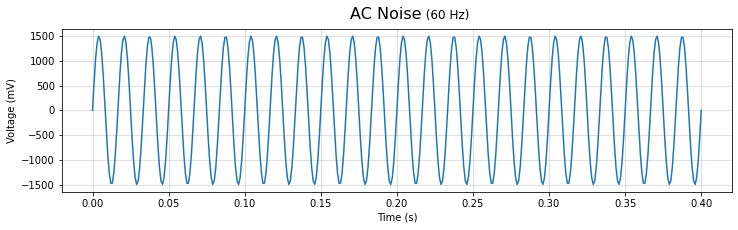

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz

x = np.linspace(start,end,dn)
noi_data = 1500*np.sin(x*math.pi*2*60)  # 교류 전원 노이즈 (60 Hz)
plt.figure(figsize=(12,3))
plt.suptitle('AC Noise',size=16)
plt.title('                          (60 Hz)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,noi_data);

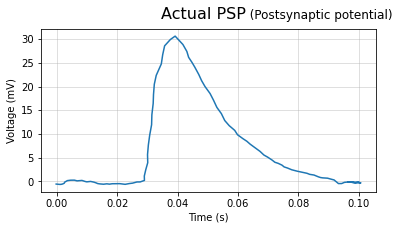

In [2]:
import csv  # psp 가정
f = open("C:/Users/enjdn/Documents/MEG_python/MEG_data_artifi/psp5.csv","rt")
reader = csv.reader(f)

col1 = []
col2 = []
for row in reader:
    col1.append(row[0])
    col2.append(row[1])

del col1[0]
del col2[0]

len(col1)

time = np.array(list(map(float, col1)))
volt = np.array(list(map(float, col2)))
plt.figure(figsize=(6, 3))  # 실제 psp 그래프
plt.suptitle('Actual PSP',size=16)
plt.title('                                                          (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(time,volt);

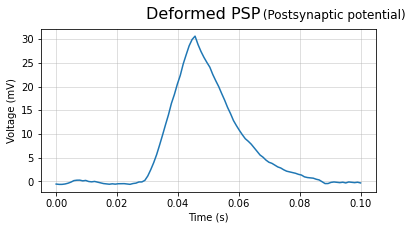

In [3]:
n = 104
x_2 = np.linspace(0,0.1,n)  # scale 조정을 위해 변형된 psp 그래프
plt.figure(figsize=(6, 3))
plt.suptitle('Deformed PSP',size=16)
plt.title('                                                                 (Postsynaptic potential)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x_2,volt);

401

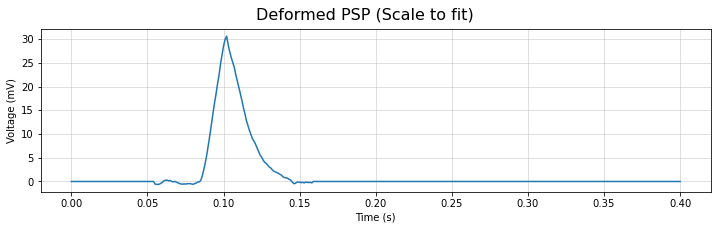

In [4]:
c = np.zeros(shape=(55,), dtype=np.int8)  # signal 0.01 s 로 
volt_1 = np.concatenate((c, volt), axis=None)
d = np.zeros(shape=(242,), dtype=np.int8)
volt_2 = np.concatenate((volt_1, d), axis=None)

plt.figure(figsize=(12,3))
plt.suptitle('Deformed PSP (Scale to fit)',size=16)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(which='major',axis='both',alpha=0.5)
plt.plot(x,volt_2);  # noise와 scale 맞추기
len(volt_2)

In [5]:
# Biot-Savart Law에 따른 signal 자기장

n,m = 9, 9
sensor_array = np.zeros((n,m), dtype = np.ndarray)  # n X m 채널 sensor의 위치
for i in range(n):
    for j in range(m):
        sensor_array[i,j] = np.array([4*(i-(n-1)/2),4*(j-(m-1)/2),4])  # [0,0]으로 위치 세팅 & 채널 간격 4cm

sig = np.array([1,1,0])  # signal의 방향 및 크기 (4 cm 로 가정)
noi_1 = np.array([0,1000,4])  # noise의 위치(1 m로 가정)  


dl_vec_sig = sig/np.linalg.norm(sig)  # signal의 단위 벡터

R_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 signal이 떨어진 거리 R
for i in range(n):
    for j in range(m):
        R_sig[i,j] = np.linalg.norm(sensor_array[i,j])

a_R_sig = sensor_array/R_sig  # 각각의 sensor 채널을 향하는 R의 단위벡터 a_R

H_vec_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 signal 벡터의 크기
for i in range(n):
    for j in range(m):
        H_vec_sig[i,j] = np.cross(dl_vec_sig,a_R_sig[i,j])

H_sig = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) 
for i in range(n):
    for j in range(m):
        g_noise = np.random.randn(401)  # 가우시안 noise 생성 
        H_sig[i,j]  = (float(H_vec_sig[i,j][2])/((4*np.pi)*float(R_sig[i,j])**2))*volt_2 + g_noise*0.001

        
R_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor 채널과 noise가 떨어진 거리 R (1 m)
for i in range(n):
    for j in range(m):
        R_noi_1[i,j] = np.linalg.norm(sensor_array[i,j]-noi_1)

H_noi_1 = np.zeros((n,m), dtype = np.ndarray)  # 각각의 sensor에 들어오는 최종 noise의 자기장 (with Biot-Savart Law) (1 m)
for i in range(n):
    for j in range(m):
        H_noi_1[i,j] = noi_data/(2*np.pi*R_noi_1[i,j])

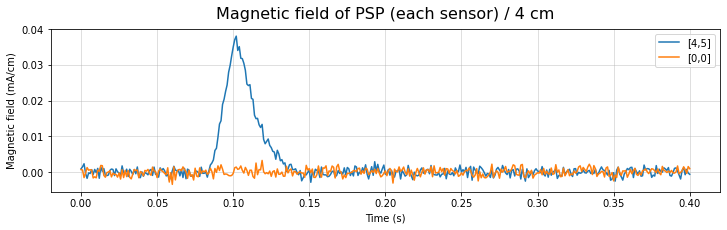

In [6]:
plt.figure(figsize=(12, 3)) # Sensor에 들어오는 최종 signal의 자기장 (with Biot-Savart Law) + 각 채널에 가우시안 noise 
plt.title('Magnetic field of PSP (each sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
plt.plot(x,H_sig[4,5], label='[4,5]')  # Sensor[4,5]에서 signal
plt.plot(x,H_sig[0,0], label='[0,0]')  # Sensor[0,0]에서 signal
plt.legend();

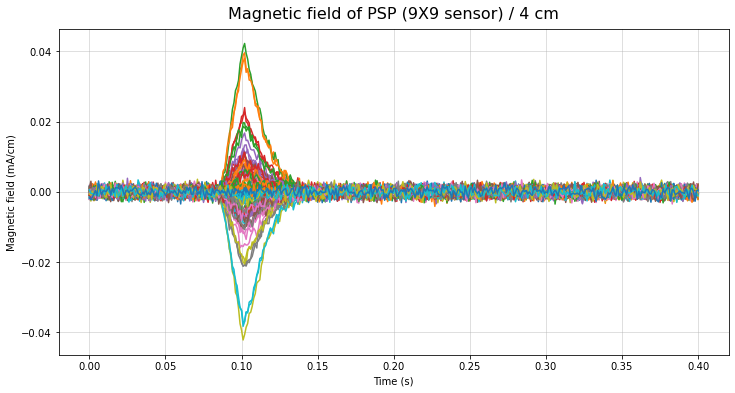

In [7]:
plt.figure(figsize=(12, 6)) # 9 X 9 Sensor에 들어오는 최종 signal의 자기장
plt.title('Magnetic field of PSP (9X9 sensor) / 4 cm',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_sig[i,j])

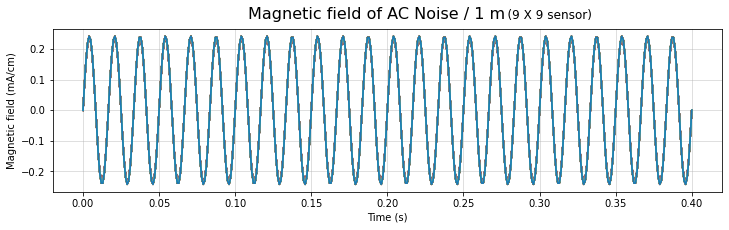

In [8]:
plt.figure(figsize=(12, 3)) 
plt.suptitle('Magnetic field of AC Noise / 1 m',size=16)
plt.title('                                                                                    (9 X 9 sensor)',pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x,H_noi_1[i,j])

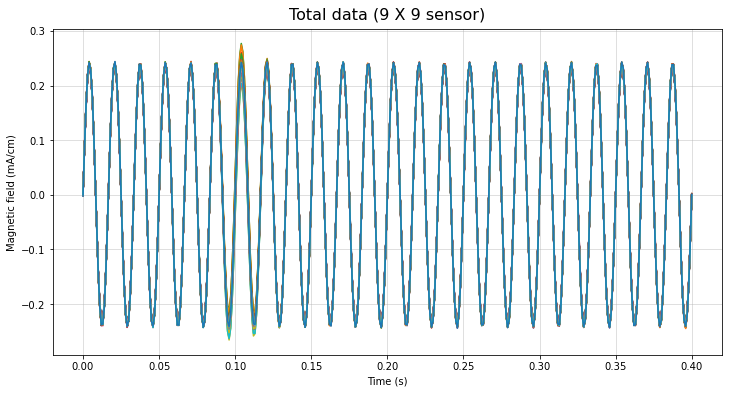

In [9]:
plt.figure(figsize=(12, 6))  # 각각의 sensor 에서 받아들인 총 데이터  (1 m)
plt.title('Total data (9 X 9 sensor)',size=16, pad=10)
plt.xlabel('Time (s)')
plt.ylabel('Magnetic field (mA/cm)')
plt.grid(which='both',axis='both',alpha=0.5)
for i in range(n):
    for j in range(m):
        plt.plot(x, H_sig[i,j] + H_noi_1[i,j])

In [10]:
H_all_f_1 = []  # 각각의 sensor 에서 받아들인 총 신호  (1 m)
for i in range(n):
    for j in range(m):
        H_all_f_1.append(list(H_sig[i,j] + H_noi_1[i,j]))
len(H_all_f_1)

81

In [11]:
import pandas as pd

# frame = pd.DataFrame(H_all_f)

start = 0
end = 0.4
dn = 401  # !!sampling rate : 1000 Hz
x = np.linspace(start,end,dn)

indexName_col = x  # Data frame에 각 센서별 데이터 기록
indexName = []
for i in range(n*m):
    indexName.append('Sensor_'+str(i+1))
df = pd.DataFrame(H_all_f_1, columns = indexName_col,index = indexName)
df

,0.000,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,...,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400
Sensor_1,0.000699,0.087081,0.159286,0.212320,0.235754,0.223984,0.181686,0.113783,0.027809,-0.059745,...,0.058474,-0.027726,-0.113648,-0.181091,-0.223097,-0.232991,-0.211825,-0.161180,-0.084933,0.000945
Sensor_2,0.000163,0.088214,0.162389,0.210904,0.234544,0.224288,0.181334,0.115501,0.028760,-0.058650,...,0.058858,-0.029254,-0.114750,-0.181242,-0.226071,-0.237328,-0.212588,-0.161841,-0.086246,0.000876
Sensor_3,0.000124,0.086938,0.161675,0.214563,0.237214,0.226098,0.181654,0.112403,0.029438,-0.057857,...,0.058729,-0.028284,-0.114680,-0.183024,-0.223223,-0.236287,-0.212301,-0.162176,-0.087468,-0.001207
Sensor_4,0.000856,0.087925,0.160861,0.214065,0.235901,0.227133,0.183189,0.115019,0.028819,-0.059726,...,0.058174,-0.029814,-0.113818,-0.182755,-0.226621,-0.238274,-0.214593,-0.162169,-0.088158,-0.000808
Sensor_5,0.001451,0.088609,0.164410,0.217743,0.239167,0.227194,0.185240,0.114718,0.029832,-0.058904,...,0.059677,-0.029643,-0.115887,-0.182872,-0.226393,-0.238008,-0.217221,-0.165338,-0.086522,-0.000342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sensor_77,-0.000454,0.088675,0.163251,0.216300,0.236632,0.227546,0.182100,0.113278,0.029889,-0.058107,...,0.059386,-0.030683,-0.113813,-0.184235,-0.226401,-0.236655,-0.216781,-0.163354,-0.088495,-0.000244
Sensor_78,0.000786,0.087524,0.165268,0.215552,0.240087,0.227076,0.183522,0.115182,0.029951,-0.060984,...,0.060263,-0.029581,-0.115549,-0.185731,-0.228086,-0.237896,-0.217736,-0.164735,-0.088051,-0.000487
Sensor_79,-0.000562,0.087657,0.164929,0.216553,0.239850,0.230312,0.185454,0.117054,0.031686,-0.058628,...,0.058600,-0.030112,-0.114866,-0.185265,-0.227978,-0.240225,-0.215924,-0.164093,-0.087857,-0.001150
Sensor_80,0.000549,0.088524,0.164927,0.217834,0.240252,0.229787,0.185090,0.117054,0.030675,-0.059490,...,0.058732,-0.030792,-0.115777,-0.186634,-0.229344,-0.239206,-0.218690,-0.166442,-0.089332,-0.001116


In [12]:
from sklearn.preprocessing import StandardScaler
for i in range(401):
    indexName_col[i] = indexName_col[i]
time = indexName_col

Sensor_x = df.loc[:,time].values
    
x_std = StandardScaler().fit_transform(Sensor_x.T)
x_std.shape

(401, 81)

In [13]:
time_f = x_std.T
covariance_matrix = np.cov(time_f)
# np.set_printoptions(threshold=np.inf,linewidth=np.inf)  # '...' 생략 없이 출력
covariance_matrix.shape

(81, 81)

In [14]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [15]:
# 주성분별 데이터를 설명하는 정도 (10000% 기준)

print('PC1 = ',round(float(eig_vals[0]/sum(eig_vals))*10000,2),'%')
print('PC2 = ',round(float(eig_vals[1]/sum(eig_vals))*10000,2),'%')
print('PC3 = ',round(float(eig_vals[2]/sum(eig_vals))*10000,2),'%')
print('PC4 = ',round(float(eig_vals[3]/sum(eig_vals))*10000,2),'%')

PC1 =  9997.49 %
PC2 =  2.17 %
PC3 =  0.01 %
PC4 =  0.01 %


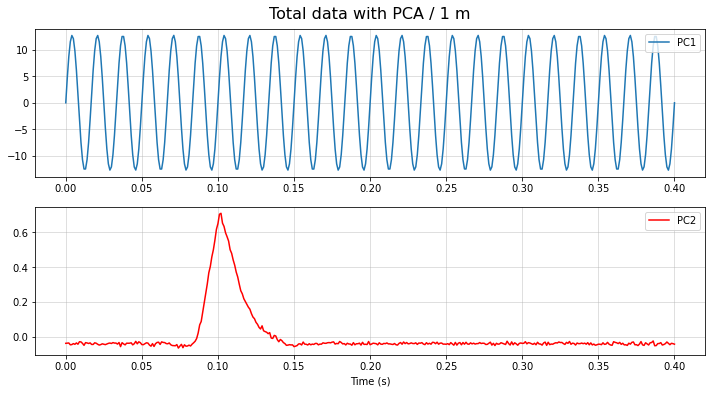

In [16]:
plt.figure(figsize=(12,6)) 
plt.subplot(2,1,1)
plt.title('Total data with PCA / 1 m',size=16, pad=10)
plt.grid(which='both',axis='both',alpha=0.5)
x_pc1 = x_std.dot(eig_vecs.T[0])
plt.plot(time,x_pc1.T,label='PC1')
plt.legend(loc='upper right')

plt.subplot(2,1,2)
plt.xlabel('Time (s)')
plt.grid(which='both',axis='both',alpha=0.5)
x_pc2 = x_std.dot(eig_vecs.T[1])
plt.plot(time,x_pc2.T, color='red',label='PC2')
plt.legend(loc='upper right');